In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [4]:
# Images already reshaped as 32x32.
# 3 Color channels.
# y is not one-hot-encoded yet.
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("\n")
print("Testing data X shape: {}".format(X_test.shape))
print("Testing data y shape: {}".format(y_test.shape))

Training data X shape: (50000, 32, 32, 3)
Training data y shape: (50000, 1)


Testing data X shape: (10000, 32, 32, 3)
Testing data y shape: (10000, 1)


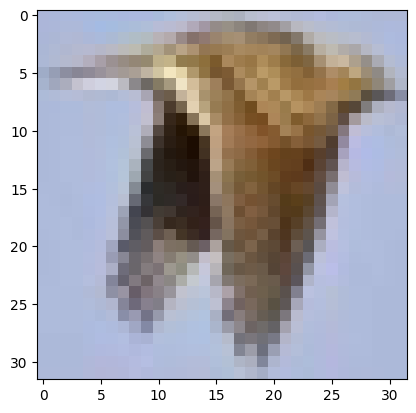

In [5]:
i_image= 123                                                        # Image index. You can change it at will.
a_single_image= X_train[i_image,:,:,:]
plt.imshow(a_single_image)                                          #  Display as a color image.
plt.show()

In [6]:
# Check for the minimum and maximum pixel value.
print("MIN : {}".format(a_single_image.min()))
print("MAX : {}".format(a_single_image.max()))

MIN : 1
MAX : 243


In [7]:
# Scaling.
X_train = X_train/255
X_test = X_test/255

In [8]:
batch_size = 8
n_epochs  = 20
learn_rate = 0.0001

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

# 1st Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(7, 7),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation=None))
# 1st Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))

In [10]:
# 2nd Convolution layer
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))                      # Apply the ReLu activation function.
# 2nd Pooling layer
model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_2'))

In [11]:
# Flattened full layer
model.add(tf.keras.layers.Flatten())
# fully connected layer
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1',
    activation='relu'))

In [12]:
# Dropout layer
model.add(tf.keras.layers.Dropout(
    rate=0.5))

In [13]:
# Output layer
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learn_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261,578 (16.26 MB)

 Trainable params: 4,261,578 (16.26 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    shuffle=True)

Epoch 1/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.3886 - loss: 1.6842 - val_accuracy: 0.5818 - val_loss: 1.1942
Epoch 2/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.5935 - loss: 1.1623 - val_accuracy: 0.6463 - val_loss: 1.0064
Epoch 3/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.6537 - loss: 0.9997 - val_accuracy: 0.6813 - val_loss: 0.9184
Epoch 4/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.6914 - loss: 0.8835 - val_accuracy: 0.6918 - val_loss: 0.8949
Epoch 5/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.7266 - loss: 0.7824 - val_accuracy: 0.7030 - val_loss: 0.8637
Epoch 6/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.7557 - loss: 0.7132 - val_accuracy: 0.7086 - val_loss: 0.8505
Epoch 7/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.7827 - loss: 0.6235 - val_accuracy: 0.7262 - val_loss: 0.8059
Epoch 8/20
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8090 - loss: 0